# 3.2 비트코인 시세 예측하기
다음으로 살펴볼 예제는 비트코인 시세 예측입니다. 비트코인 시세처럼 연속적인 시간에 따라 다르게 측정되는 데이터를 시계열 데이터라 하며, 이를 분석하는 것을 '시계열 데이터 분석'이라고 합니다. 시계열 데이터 분석은 심작 박동 데이터처럼 규치적 시계열 데이터를 분석하는 것과 비트코인 시세예측처럼 불규칙적 시계열 데이터를 분석하는 것으로 구분할 수 있습니다.

## Step 1 탐색: 시간 정보가 포함된 데이터 살펴보기우선 
우선 비트코인 데이터를 탐색합니다. 다음 코드로 데이터셋을 살펴보면, 비트코인 데이터는 총 365개의 행으로 이우러진 것을 알 수 있습니다. 또한 데이터는 결측값이 없이 날짜와 가격에 대한 2개의 피처로 구성되어 있습니다. 이러한 데이터셋을 시계열 데이터셋이라고 합니다.

#### market price 데이터셋의 기본 정보 구하기

In [62]:
# -*- coding: utf-8 -*-
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Source: https://www.blockchin.com/ko/charts/market-price?timespan=60days
file_path='data/market-price.csv'
bitcoin_df=pd.read_csv(file_path, names=['day','price'])

#기본 정보를 출력합니다.
print(bitcoin_df.shape)
print(bitcoin_df.info())
bitcoin_df.tail()

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


,day,price
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231
364,2018-08-26 00:00:00,6673.274167


그리고 아래의 코드는 시계열 정보를 데이터 프레임의 index로 설정하여 가격의 추이를 시각화한 것입니다.

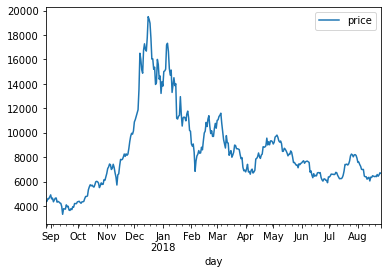

In [63]:
# to_datetime으로 day 피처를 시계열 피처로 변환합니다.
bitcoin_df['day']=pd.to_datetime(bitcoin_df['day'])

# day 데이터 프레임의 index로 설정합니다.
bitcoin_df.index=bitcoin_df['day']
bitcoin_df.set_index('day', inplace=True)

# 일자별 비트코인 시세를 시각화합니다.
bitcoin_df.plot()
plt.show()

## Step 2 예측: 파이썬 라이브러리를 활용해 시세 예측하기
이번 절에서 첫 번쨰로 사용할 시계열 예측 분석 방법은 ARIMA 분석 방법입니다. ARIMA는 전통적인 시계열 예측 방법으로 크게 두 가지 개념을 포함하고 있습니다. 첫 번쨰는 AR모델로 자기 자신과 과거를 정보로 사용하는 개념입니다. 이는'현재의 상태는 이전의 상태를 참고해서 계산된다'라는 아이디어를 전제로 합니다.<br>
두 번쨰 개념은 MA모델로 '이전 항에서의 오차를 이용하여 현재 항의 상태를 추록하겠다'라는 방법입니다. 그리고 이 둘을 합친 것을 ARMA 모델이라고 하며, 조금 더 나아간 ARIMA모델은 ARMA 모델에 추세 변동의 경향성까지 반영한 방법입니다 <br>
파이썬에서는 statsmodel 모듈로 ARIMA 분석을 수행할 수 있습니다. 다음 코드는 ARIMA 분석의 실행 과정입니다. ARIMA 클래서에 order=(2,1,2)라고 입력되어진 파라미터는 'AR이 몇 번째 과거까지를 바라보는지에 대한 피라미터(2), 차분에 대한 피러미터(1), MA가 몇 번째 과거까지를 바라보는지에 대한 파라미터(2)'를 의미하는 것입니다.<br>
이제 아래의 실행 결과를 분석해봅시다. 실행 결과의 표를 살펴보면 상수항을 제외한 모든 계수의 p-value가 0.05 이하로 유의미한 것으로 나타납니다. 이것은 AR 과 MA 모두 2로 설정하는 것이 꽤나 의미 있는 분석 결과를 도출한다는 것입니다.

#### ARIMA 모델 활용하기: 모델 학습

In [64]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1 MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model=ARIMA(bitcoin_df.price.values, order=(2,1,2))
model_fit=model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

/home/dmlrkd67/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.553
Method:                       css-mle   S.D. of innovations            512.415
Date:                Thu, 30 Sep 2021   AIC                           5587.107
Time:                        17:07:26   BIC                           5610.490
Sample:                             1   HQIC                          5596.400
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3355     27.794      0.228      0.820     -48.140      60.811
ar.L1.D.y     -0.3787      1.825     -0.208      0.836      -3.955       3.198
ar.L2.D.y      0.1587      1.189      0.133      0.8

/home/dmlrkd67/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


다음으로 ARIMA 모델의 학습 결과를 알아보겠습니다. 아래의 살행 결과 중 첫 번째 그래프는 학습한 모델에 학습 데이터셋을 넣었을 때의 시계열 예측 결과입니다. plot_predict()라는 함수로 이러한 시각화를 자동으로 수행할 수 있습니다.

#### ARIMA 모델 활용하기: 모델의 성능& 예측 결과 시각화

<AxesSubplot:>

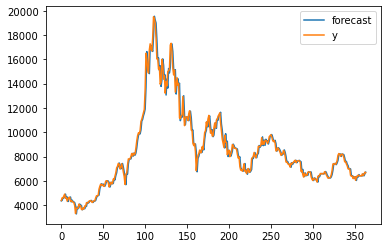

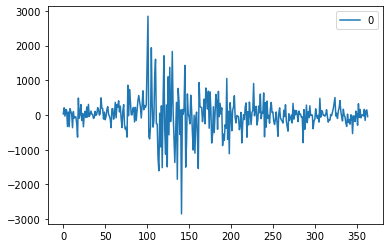

In [65]:
fig=model_fit.plot_predict() # 학습 데이터에 대학 예측 결과입니다.(첫 번째 그래프)
residuals=pd.DataFrame(model_fit.resid) # 잔차의 변돌을 시각화합니다.(두 번째 그래프)
residuals.plot()

두 번째 그래프는 실제값과 예측값 사이의 오차 변동을 나타내는 그래프입니다. 만약 이 그래프의 폭이 일ㄷ정하다면 좋은 예측 모델을 학습시킨 것이라고 생각할 수 있습니다. 하지만 실행 결과에서는 오차 변동이 매우 불안정한 것으로 보입니다.<br>
다음으로 ARIMA 모델을 평가해봅시다. 모델을 평가하기 위해서는 테스트 전용 데이터가 필요한데 이번 예제에서는 5일 동안의 미래를 테스트 데이터로 사용하겠습니다. 불규칙적 시계열 예측의 경우에는 먼 미래를 예측하는 것이 큰 의미가 없으므로 '앞으로 N일 동안 어느정도로 상승/하락할 것이다' 정도의 대략적인 경향 예측만을 수행하는 것이 일반적이기 때문입니다.

모델 평가의 과정은 다음과 같습니다.
 - 1. model_fit.forecast(steps=5)로 향후 5일의 가격을 예측하여 pred_y로 정의한다.
 - 2. '../data/market-price-test.csv'에서 실제 향후 5일의 가격을 test_y로 정의한다.
 - 3. 모델의 예측한 상한값, 하한값을 pred_y_upper,pred_y_lower로 정의한다.
 - 4. 정의한 모든 값을 비교하여 5일 동안의 상승 경향 예측이 얼마나 맞았는지를 평가한다.

#### ARIMA 모델 활용하기: 실제 데이터와의 비교

In [66]:
forecast_data= model_fit.forecast(steps=5) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

# 테스트 데이터셋을 불러옵니다.
test_file_path = 'data/market-price-test.csv'
bitcoin_test_df =pd.read_csv(test_file_path, names=['ds','y'])

pred_y=forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. ( 2018-08-27 ~ 2018-08-31 )
test_y=bitcoin_test_df.y.values # 실제 5일 가격 데이터입니다. ( 2018-08-27 ~ 2018-08-31 )
pred_y_lower=[] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper=[] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower=lower_upper[0]
    upper=lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

그리고 다음 코드는 이를 그래프로 시각화한 것입니다. 파란색 그래프는 모델이 예상한 최고 가격, 즉 상한가의 그래프입니다. 그리고 빨간색은 모델이 예측한 하한가 그래프이고, 초록색은 실제 5일간의 가격 그래프, 노락색은 모델이 예측한 5일간의 가격 그래프를 나타낸 것입니다.

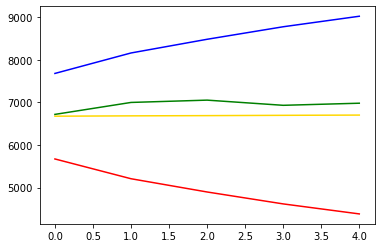

In [67]:
plt.plot(pred_y,color="gold") # 모델이 예측한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예측한 최저 가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예측한 최고 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

이번에는 상한가와 하한가를 제외한 뒤, 그래프를 살펴보았습니다. 그래프의 상승 경향을 살펴보면 그다지 좋지 않은 예측을 한 것으로 보입니다. 하지만'5일 동안 상승할 것이다'라는 아주 큰 트렌드 정도는 예측할 수 있었습니다.

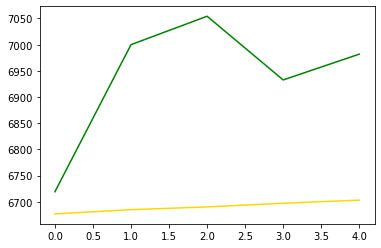

In [68]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

이번에는 ARIMA보다 조금 더 정확한 트렌드 예측 분석을 제공하는 라이브러리'Facebook Prophet'을 사용해봅시다. Prophet은 Additive 모델이라는 모델링 방법에 기반한 시계열 예측 모델로서 시계열 데이터의 트렌드성(연간/월간/일간)을 예측하는 것에 초점이 맞추어져 있습니다. 다음 명령어로 prophet 라이브러리를 설치해봅시다.

fbprophet 라이브러리를 사용하기 위해서는 데이터 프레임의 피처를 'ds'와 'y'로 변경해야 합니다. 그리고 Prophet이라는 클래스를 선언한 뒤, fit() 함수로 모델을 학습시킵니다. 모델 생성에 포함되는 파라미터의 의미는 다음과 같습니다.
- seasonality_mode : 연간,월간,주간,일간 등의 트렌드성을 반영하는 것을 의미하는 파라미터입니다.
- changepoint_prior_scale : 트렌드가 변경되는 문맥을 반영하는 파라미터입니다. 수치가 높을수록 모델은 과적합에 가까워집니다.<br> 아래 코드는 Facebook Prophet을 활용하여 시계열 모델을 학습하는 코드입니다.

In [69]:
from fbprophet import Prophet

# prophet을 사용하기 위해서는 다음과 같이 피처명을 변경해야 한다. : 'ds', 'y'
file_path='data/market-price.csv'
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])
prophet = Prophet(seasonality_mode = 'multiplicative',
                  yearly_seasonality = True,
                  weekly_seasonality = True, 
                  daily_seasonality = True,
                  changepoint_prior_scale = 0.5)
prophet.fit(bitcoin_df)

그리고 다음 코드 중 make_future_dataframe(periods=5, freq='d'), prophet,predict(future_data)를 실행하면 학습 데이터셋 기반의 5일 단위 예측 데이터를 얻을 수 있습니다. 아래의 실행 결과는 데이터에 존재하지 않는 5일 단위의 미래를 예측한 것입니다. 

In [70]:
# 5일을 내다보며 예측한다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
365,2018-08-27,6876.163700,6188.809614,7558.170820
366,2018-08-28,6962.557446,6357.300305,7657.258889
367,2018-08-29,6968.861585,6300.280083,7632.395888
368,2018-08-30,7029.151820,6301.471741,7767.313149
369,2018-08-31,7097.227263,6311.927417,7923.046401


다음은 fbprophet 모델의 학습 결과를 시각화한 결과입니다. 그래프의 검은 점은 실제 가격을 나타낸 것이고, 파란 선은 예측 가격을 나타낸 것입니다. 이 모델 역시 ARIMA 모델과 마찬가지로 학습 데이터셋에 대해서는 거의 정확한 예측을 하고 있습니다. 하지만 시계열 데이터 분석에서 학습 데이터를 잘 예측하는 것은 큰 위미가 없다고 할 수 있습니다.

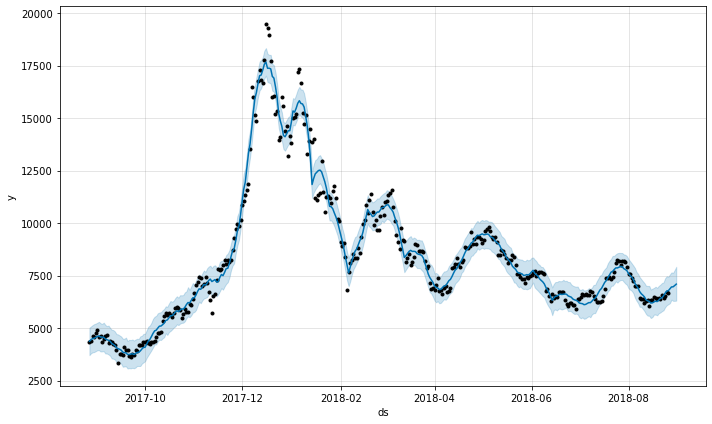

In [71]:
fig1 = prophet.plot(forecast_data)

그리고 다음의 그래프는 fbprophet에서 제공하는 트렌드 정보 시각화 그래프입니다. 앞서 seasonality_mode 파라미터를 설정해놓은 경우에만 이 시각화가 가능합니다. 우리는 이를 통해 시계열 데이터가 어떤 흐름을 가지고 변화하는지를 살펴볼 수 있습니다. 전체적인 데이터의 트렌드는 아래의 첫 번째 그래프로 살펴볼 수 있고, 이어지는 그래프에서는 year.weekly,daily 순의 트렌드를 확인할 수 있습니다.

/home/dmlrkd67/anaconda3/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/home/dmlrkd67/anaconda3/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/home/dmlrkd67/anaconda3/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


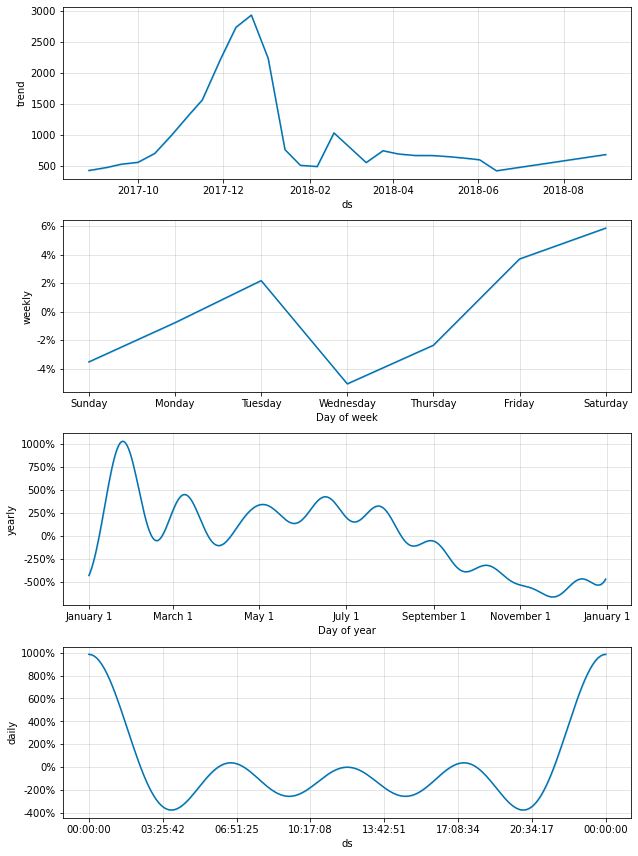

In [72]:
fig2 = prophet.plot_components(forecast_data)

ARIMA 모델을 평가한 것과 동일한 방법으로 테스트 데이터셋을 평가해봅시다. 다음 코드의 실행결과, ARIMA 모델보다는 prophet 모델이 실제 price값에 더 근접한 예측을 하는 것처럼 보입니다. 이를 RMSE와 함께 더 자세히 살펴봅시다.

#### Facebook Prophet 활용하기: 실제 데이터와의 비교

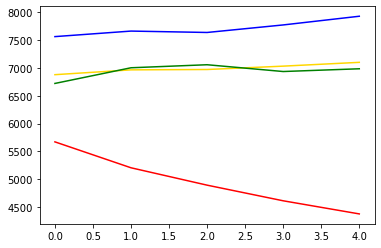

In [73]:
bitcoin_test_df=pd.read_csv(test_file_path, names=['ds','y'])

#마지막 5일의 예측 데이터입니다. ( 2018-08-27 ~ 2018-08-31 )
pred_y = forecast_data.yhat.values[-5:]
#실제 5일의 가격 데이터입니다. ( 2018-08-27 ~ 2018-08-31 )
test_y = bitcoin_test_df.y.values
# 마지막 5일 예측 데이터의 최소값입니다.
pred_y_lower - forecast_data.yhat_lower.values[-5:]
# 마지막 5일의 예측 데이터의 최대값입니다.
pred_y_upper = forecast_data.yhat_upper.values[-5:]

plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최저 가격 그래프입니다.
plt.plot(pred_y_upper, color='blue') # 모델이 예상한 최고 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

다음으로 이 모델의 Test RMSE를 ARIMA 모델과 비교해봅시다. ARIMA 모델의 Test RMSE는 309 정도였던 것에 반해 이 모델의 Test RMSE는 101 정도로 감소하였습니다 또한'5일 동안 얼마만큼 상승할 것이다'라는 트렌드를 꽤나 정확하게 예측한 것으로 보입니다.

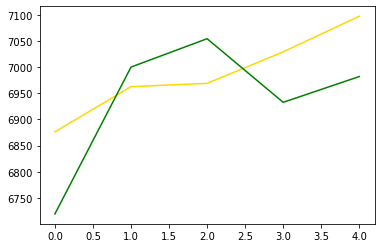

In [74]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [75]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [76]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

105.75197425064782


## Step 3 활용: 더 나은 결과를 위한 방법
이번 분석 단계에서는 모델의 성능을 조금 더 향상시킬 수 있는 방법들에 대해 알아보겠습니다.<br>
첫 번째로 고려해볼 방법은 상한값 혹은 하한값을 지정해 주는 것입니다. 바닥과 천장이 없는 주가 데이터의 경우에는 의미가 없을 수 있지만 일반적인 시계열 데이터에서는 상한값 혹은 하한값을 설정해 주는 것이 모델의 성능을 높여줄 수 있는 방법중 하나입니다.<br>
Prophet 모델에서는 future_data['cap']= 20,000을 통해 데이터셋에 상한선을 설정할 수 있습니다. 다음 코드와 실행 결과는 상한선을 적용한 학습 결과를 시각화한 것입니다. 겉으로 보기에는 원래의 결과와 별 차이가 없어 보입니다.

#### 상한가 및 하한가 설정하기

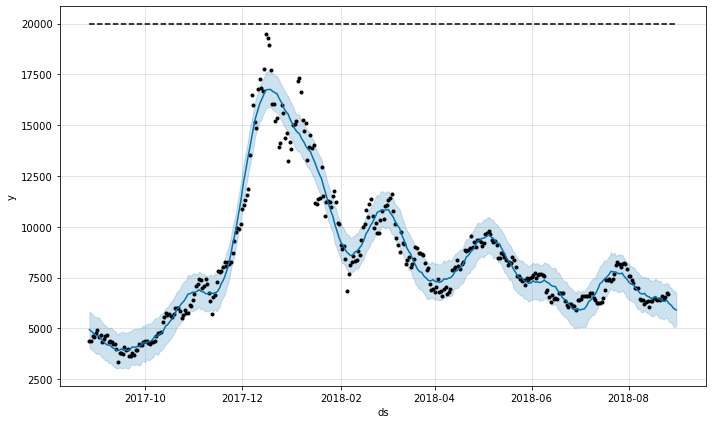

In [77]:
bitcoin_df=pd.read_csv(file_path, names=['ds','y'])

# 상한가를 설정합니다.
bitcoin_df['cap']=20000

# 상한가 적용을 위한 파라미터를 다음과 같이 설정합니다.
prophet=Prophet(seasonality_mode='multiplicative',
               growth='logistic',
               yearly_seasonality=True,
               weekly_seasonality=True, daily_seasonality=True,
               changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

# 5일을 내다보며 예측합니다.
future_data=prophet.make_future_dataframe(periods=5, freq='d')

# 상한가를 설정합니다.
future_data['cap'] = 20000
forecast_data=prophet.predict(future_data)

fig = prophet.plot(forecast_data)

이번에는 아래의 코드로 예측값과 실제값을 비교해봅시다.

#### 예측과 실제 비교 그래프

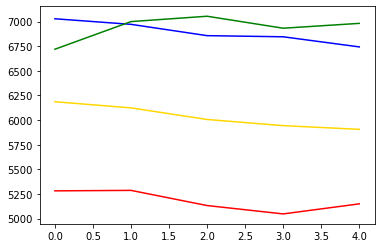

In [78]:
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds','y'])

# 모델이 예측한 마지막 5일의 가격 데이터를 가져옵니다.
pred_y = forecast_data.yhat.values[-5:]
test_y = bitcoin_test_df.y.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

plt.plot(pred_y, color='gold') # 모델이 예측한 가격 그래프입니다.
plt.plot(pred_y_lower, color='red') # 모델이 예측한 상한가 그래프입니다.
plt.plot(pred_y_upper, color='blue') # 모델이 예측한 상한가 그래프입니다.
plt.plot(test_y, color='green') # 실제 가격 그래프입니다.

예측 모델이 형편없는 결과를 예측했다는 것을 알 수 있습니다. 모델이 예측한 상한가(파란색)보다 실제가격(녹색)이 더 높기 떄문입니다. 게다가 이번에는 '5일 동안 상승/하락할 것이다'라는 큰 범위의 트렌드를 예측하는 것조차 실패했습니다. 상한가라는 개념이 큰 의미가 없는 비트코인 데이터의 경우에는 상한선을 설정한 것이 오히려 독이 되었다고 볼 수 있습니다.

이제, 모델의 성능을 향상시키는 다른 방법 중 하나인 이상치 제거 기법을 살펴보겠습니다. 이상치란 평균적인 수치에 비해 지나치게 높거나 낮은 수치의 데이터를 의미합니다. 이전 예제에서 살펴보았던 상자 그림의 울타리 밖 영역에 있는 데이터들을 이상치 데이터라고 합니다.<br>
fbprophet 모델이 이상치를 제거한 데이터로 학습하려면 이상치에 해당하는 데이터를 None으로 설정해주면 됩니다. 다음 코드에서는 18,000 이상을 이상치라고 설정하였습니다. 그리고 나머지 부분은 이전과 동일하게 실행합니다. 그래프만 놓고 본다면 이전과 큰 차이가 없어보입니다.

#### 이상치 제거

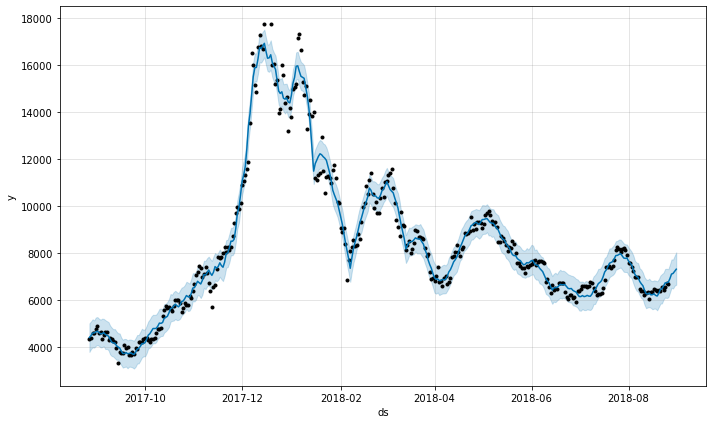

In [89]:
# 18,000 이상의 데이터는 이상치라고 판단합니다.
bitcoin_df = pd.read_csv(file_path, names=['ds','y'])
bitcoin_df.loc[bitcoin_df['y'] > 18000, 'y'] = None
# prophet 모델을 학습합니다.
prophet = Prophet(seasonality_mode='multiplicative',
                 yearly_seasonality=True,
                 weekly_seasonality=True, daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

# 5일 단위의 미래를 예측합니다.
future_data=prophet.make_future_dataframe(periods=5, freq='d')
foreacast_data=prophet.predict(future_data)

# 예측 결과를 그래프로 출력합니다.
fig = prophet.plot(forecast_data)

마찬가지 방법으로 예측값과 실제값을 그래프로 나타내봅시다.

926.1223376818108


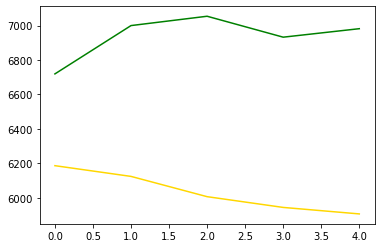

In [90]:
plt.plot(pred_y, color="gold") # 모델이 예측한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

# 테스트 데이터의 RMSE를 출력합니다.
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

이를 살펴본 결과, 이상치를 제거하는 것이 정확도(RMSE)면에서는 떨어지지만'트렌드'를 예측하는 측면에서는 이전 모델보다 더 낫다고 볼 수 있습니다.

## 표로 정리하는 데이터 분석
- 주요 키워드 : 핵심 내용 : 설명
- 시계열 데이터 분석 : 시계열 데이터 분석의 정의 : 연도, 월, 일자 같은 시간성을 띠는 데이터를 학습하여 미래의 수치를 예측하는 분석입니다.
- ARIMA모델링 : 시계열 예측 분석 방법 : ARIMA 모델은 '얼마만큼의 나를 돌아보며','얼마만큼의 차분을 이용하여 규칙성을 줄 것이며','얼마만큼의 오차를 관찰할 것인지'를 활용한 시계열 예측 분석의 방법입니다.
- 모델의 평가 : 학습 데이터셋과 테스트 데이터셋의 분리 : 특정한 시간 혹은 일자를 기준으로 학습 데이터셋과 테스트 데이터셋을 분리합니다.
- 모델 개선의 방법 : 상한선과 하한선 설정, 이상치 제거 : 더 나은 분석을 위해 상한선과 하한선을 설정하거나 이상치를 제거하는 방법을 사용할 수 있습니다.

출처 : "이것이 데이터 분석이다 with 파이썬"